In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
g = RandGraph(graph_type='simple', actors=100,moving=5)

In [177]:
def actors_position(g):
    h = nx.Graph()
    actor_pos = {}
    for node in g.core_nodes:
        if g.graph.nodes()[node]['actors']:
            nb_actors = len(g.graph.nodes()[node]['actors'])
            for actor in range(nb_actors):
                name = '%d_%d' % (node,actor)
                h.add_node(name)
                x = pos[node][0]
                x_actor = 0.01* np.random.randn() + x
                y = pos[node][1]
                y_actor = 0.01*np.random.randn() + y
                actor_pos[name] =  np.array([x_actor,y_actor])
    return h, actor_pos

In [178]:
def get_node_sizes(g):
    node_sizes = []
    for x,attr in g.graph.nodes(data=True):
        if 'capacity' in attr:
            node_sizes.append(150 + 50 * attr['capacity'])
        else:
            node_sizes.append(150)
    return node_sizes

In [179]:
def get_node_colors(g):
    node_colors = []
    for x,attr in g.graph.nodes(data=True):
        if x in g.core_nodes:
            node_colors.append('steelblue')
        elif x in g.entry_nodes:
            node_colors.append('g')
        elif x in g.exit_nodes:
            node_colors.append('r')
        else:
            node_colors.append('black')
    return node_colors

In [180]:
def update():
    g.action()
    h, actor_pos = actors_position(g)
    nx.draw_networkx_nodes(h, actor_pos, node_size=20, node_color='black', alpha=0.5)


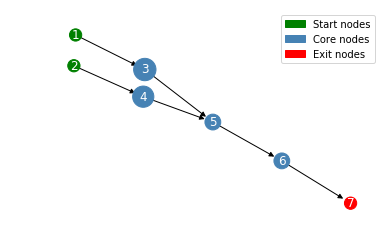

In [256]:

pos = nx.kamada_kawai_layout(g.graph)
ns = get_node_sizes(g)
nc = get_node_colors(g)
    
nx.draw_networkx_nodes(g.graph,
                               pos,
                               node_color=nc,
                               node_size=ns)

nx.draw_networkx_labels(g.graph, pos, font_color='w')
nx.draw_networkx_edges(g.graph, pos)

# h, actor_pos = actors_position(g)
# nx.draw_networkx_nodes(h, actor_pos, node_size=20, node_color='black', alpha=0.5)

update()
# plt.pause(0.01)

plt.axis('off')
#legend
blue_patch = mpatches.Patch(color='steelblue', label='Core nodes')
red_patch = mpatches.Patch(color='r', label='Exit nodes')
green_patch = mpatches.Patch(color='g', label='Start nodes')

plt.legend(handles=[green_patch,blue_patch,red_patch])
plt.show()

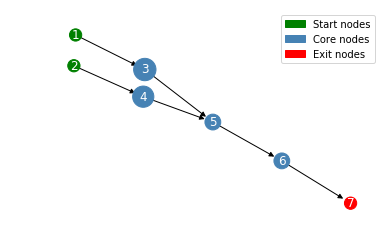

In [5]:
g.plot()

In [15]:
g.action()

(array([[0.85714286, 0.33333333, 1.        , 1.        ]]),
 0.40476190476190466)

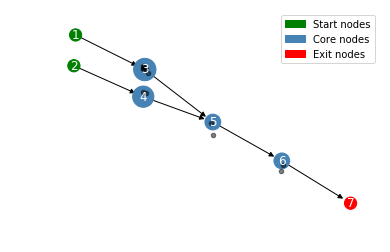

In [16]:
g.plot()